In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
iris = datasets.load_iris()
X = iris.data[0:150, 0:4]
y1 = np.zeros(50)
y2 = np.ones(50)
y3 = y2*2
y = np.append(np.append(y1, y2), y3)

In [3]:
def KNN(k, X_tr, y_tr, X_te, y_te, distace_type):
        accuracy = 0
        for i in range(X_te.shape[0]):
                distance = np.zeros((2, X_tr.shape[0]))
                clas = np.zeros(3)
                for j in range(X_tr.shape[0]):
                        distance[1, j] = np.linalg.norm(X_te[i] - X_tr[j], distace_type)
                        distance[0, j] = y_tr[j]
                index = np.lexsort(distance)
                for l in range(k):
                        clas[int(distance[0,index[l]])] +=1
                prediction = clas.argmax()
                if prediction == y_te[i]:
                        accuracy +=1

        accuracy = accuracy/X_te.shape[0]
        return accuracy

In [4]:
accuracy_all = np.zeros((4,20))

In [5]:
def KNN_iris(k, y, X, distace_type):
        acc = 0
        for i in range(150):
                X_te = X[i].reshape((1,4))
                X_tr = np.delete(X, i, axis=0)
                y_te = y[i].reshape(1)
                y_tr = np.delete(y, i, axis=0)
                acc += KNN(k, X_tr, y_tr, X_te, y_te, distace_type)
        return acc/150

In [6]:
for m in tqdm(range(20)):
        k = m + 1
        accuracy_all[0][m] = KNN_iris(k, y, X, 1)
        accuracy_all[1][m] = KNN_iris(k, y, X, 2)
        accuracy_all[2][m] = KNN_iris(k, y, X, np.inf)
        pass

100%|██████████| 20/20 [00:05<00:00,  3.45it/s]


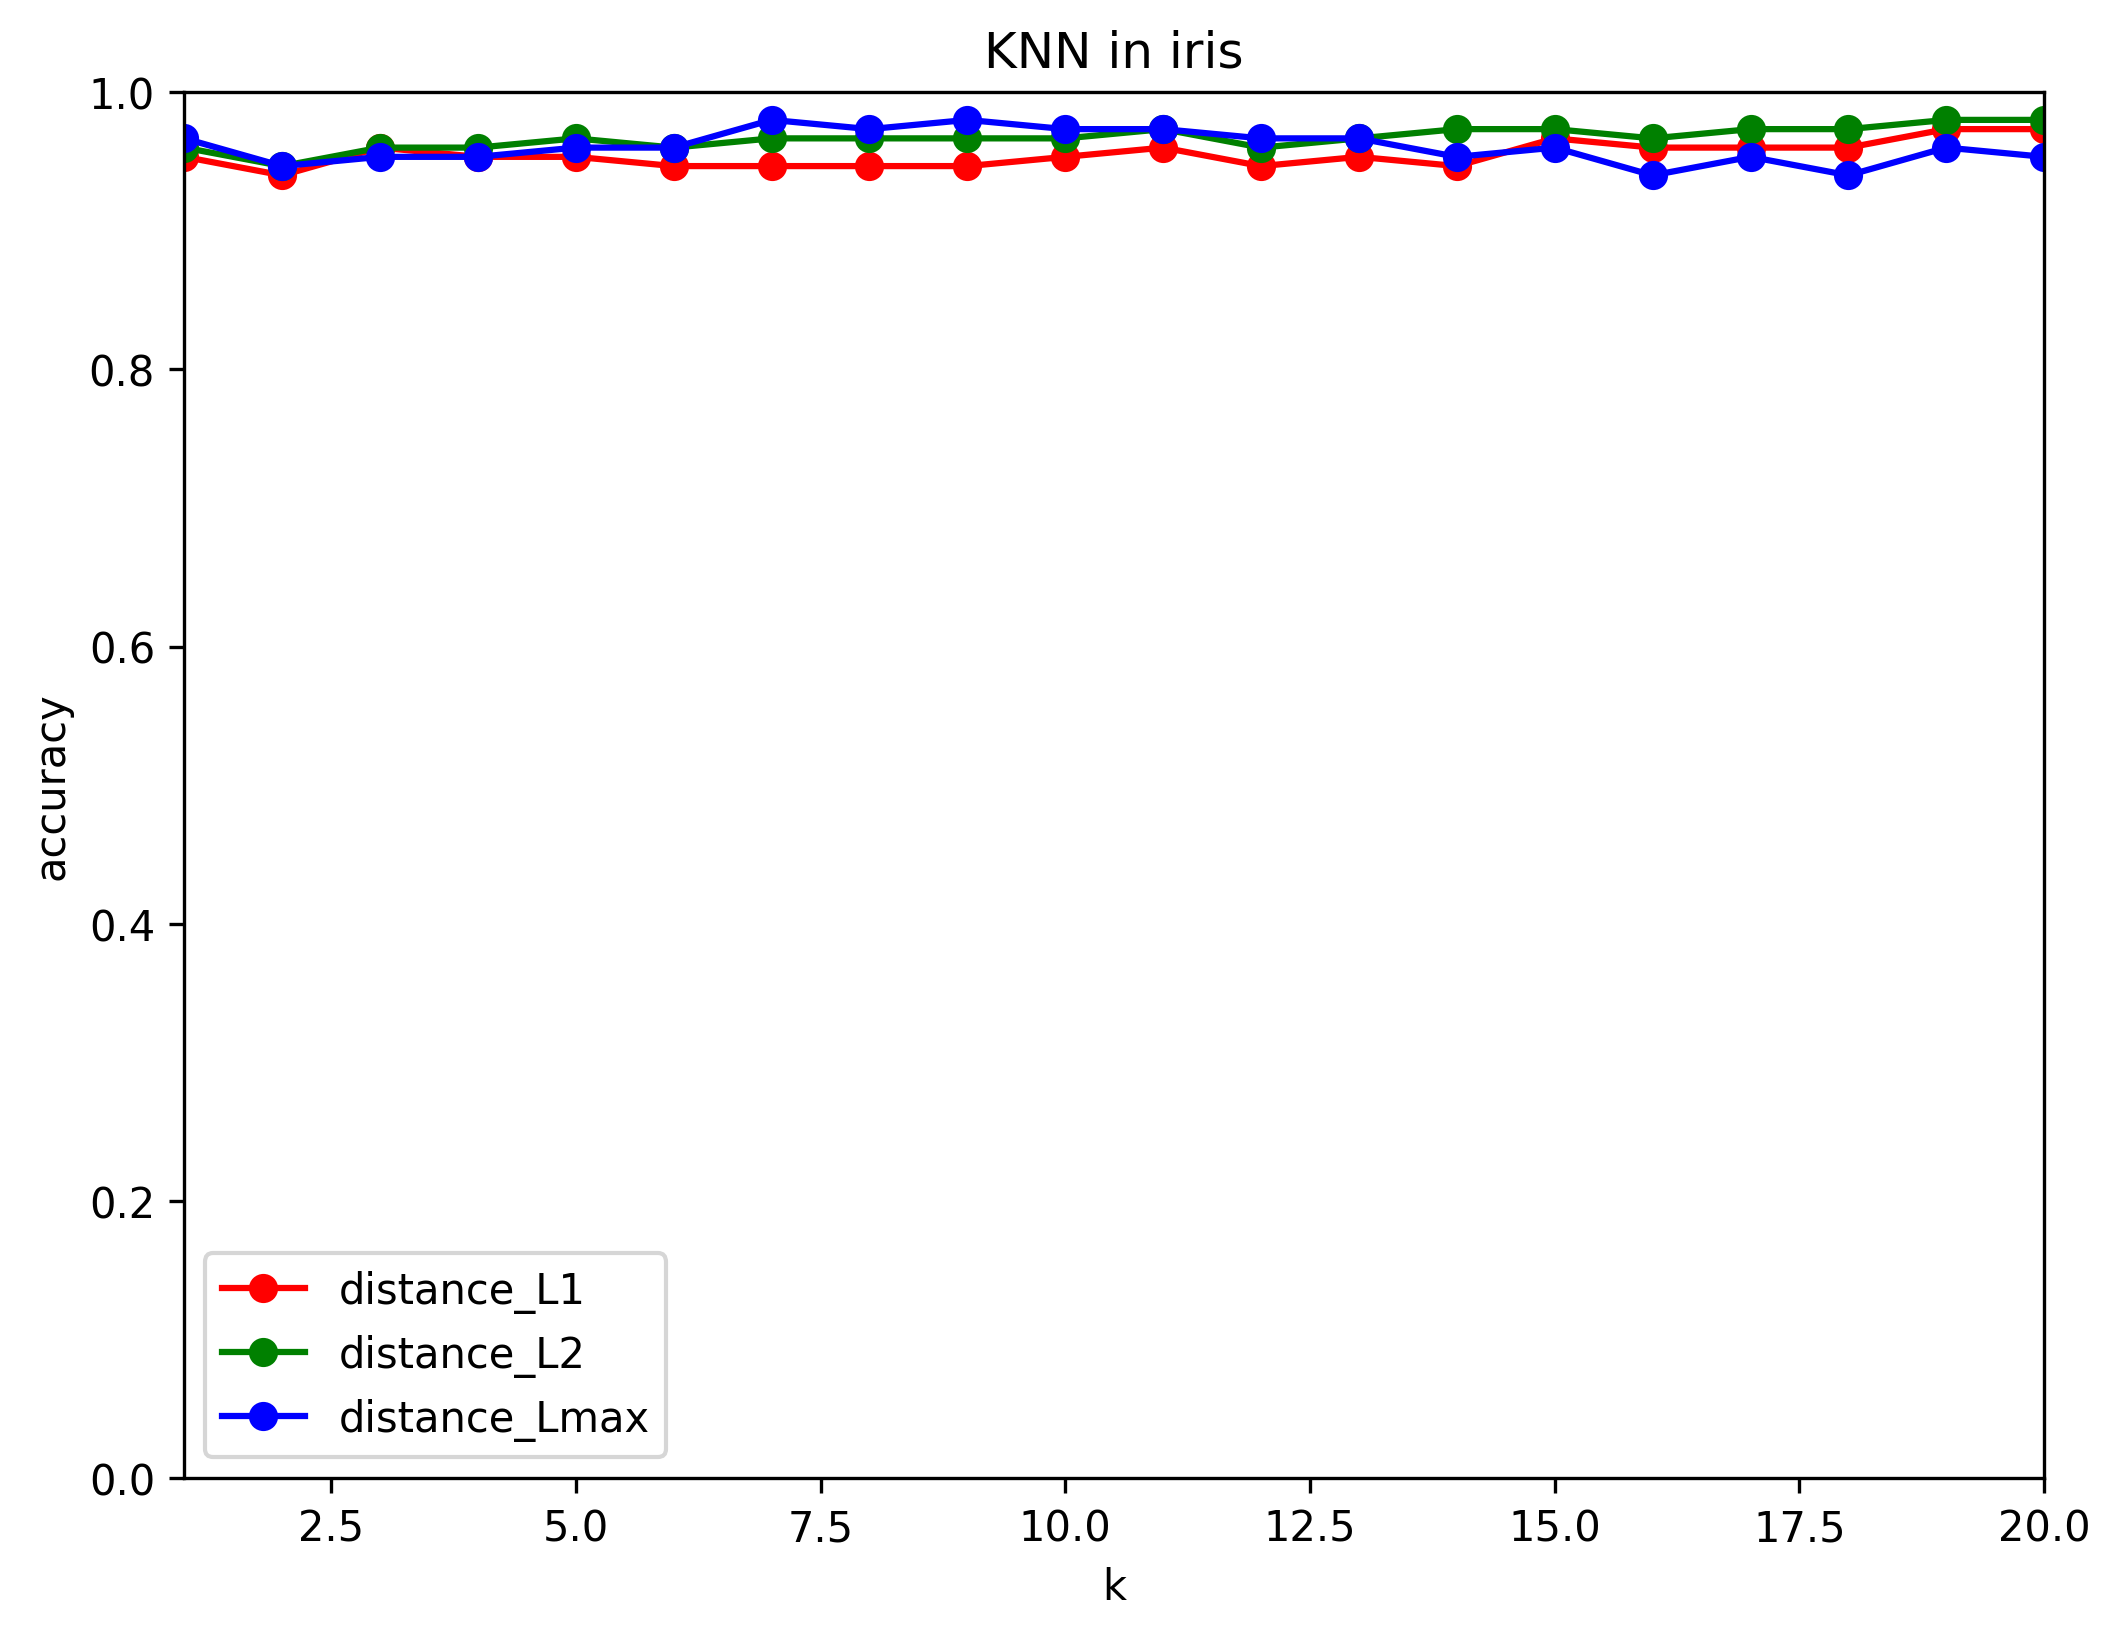

In [7]:
x = np.arange(1,21,1)
plt.figure(figsize=(8, 6), dpi=300)  # 调整图形大小和分辨率
plt.title("KNN in iris")
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xlim((1, 20))
plt.ylim((0, 1.0))
plt.plot(x, accuracy_all[0], 'r-o', label = "distance_L1")
plt.plot(x, accuracy_all[1], 'g-o', label = "distance_L2")
plt.plot(x, accuracy_all[2], 'b-o', label = "distance_Lmax")
plt.legend()
plt.savefig('result of KNN in iris.jpg')
plt.show()

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris

# 加载Iris数据集
iris = load_iris()
X = iris.data
y = iris.target
P1 = iris.data[0:50, 0:4]
P2 = iris.data[50:100, 0:4]
P3 = iris.data[100:150, 0:4]
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 初始化Fisher LDA模型，设置降维后的维数为n_components
n_components = 2  # 指定降维后的维数
lda = LinearDiscriminantAnalysis(n_components=n_components)

# 训练模型并降维
X_train_lda = lda.fit_transform(X_train, y_train)
X_lda = lda.transform(X)
P1_lda = lda.transform(P1)
P2_lda = lda.transform(P2)
P3_lda = lda.transform(P3)

In [9]:
X_lda

array([[ 8.64788479e+00,  4.92337220e-01],
       [ 7.49297835e+00, -7.13807548e-01],
       [ 7.96441674e+00, -1.76704931e-01],
       [ 7.21831830e+00, -5.49619363e-01],
       [ 8.76682870e+00,  7.28508998e-01],
       [ 8.50262972e+00,  1.70242498e+00],
       [ 7.80849775e+00,  4.51687808e-01],
       [ 8.13533692e+00,  1.84181846e-01],
       [ 6.89387426e+00, -9.71652932e-01],
       [ 7.69868135e+00, -7.55978533e-01],
       [ 9.05235553e+00,  9.17983056e-01],
       [ 7.74173296e+00,  1.12198252e-01],
       [ 7.65323460e+00, -9.34615788e-01],
       [ 7.95375281e+00, -7.58399949e-01],
       [ 1.06700258e+01,  1.84606144e+00],
       [ 1.02046640e+01,  3.04170013e+00],
       [ 9.43683198e+00,  1.96146121e+00],
       [ 8.40760184e+00,  7.09533192e-01],
       [ 8.78402215e+00,  1.25628176e+00],
       [ 8.77096310e+00,  1.36412627e+00],
       [ 7.98834258e+00,  6.91127985e-02],
       [ 8.33170954e+00,  1.34153820e+00],
       [ 9.38092417e+00,  9.73096164e-01],
       [ 6.

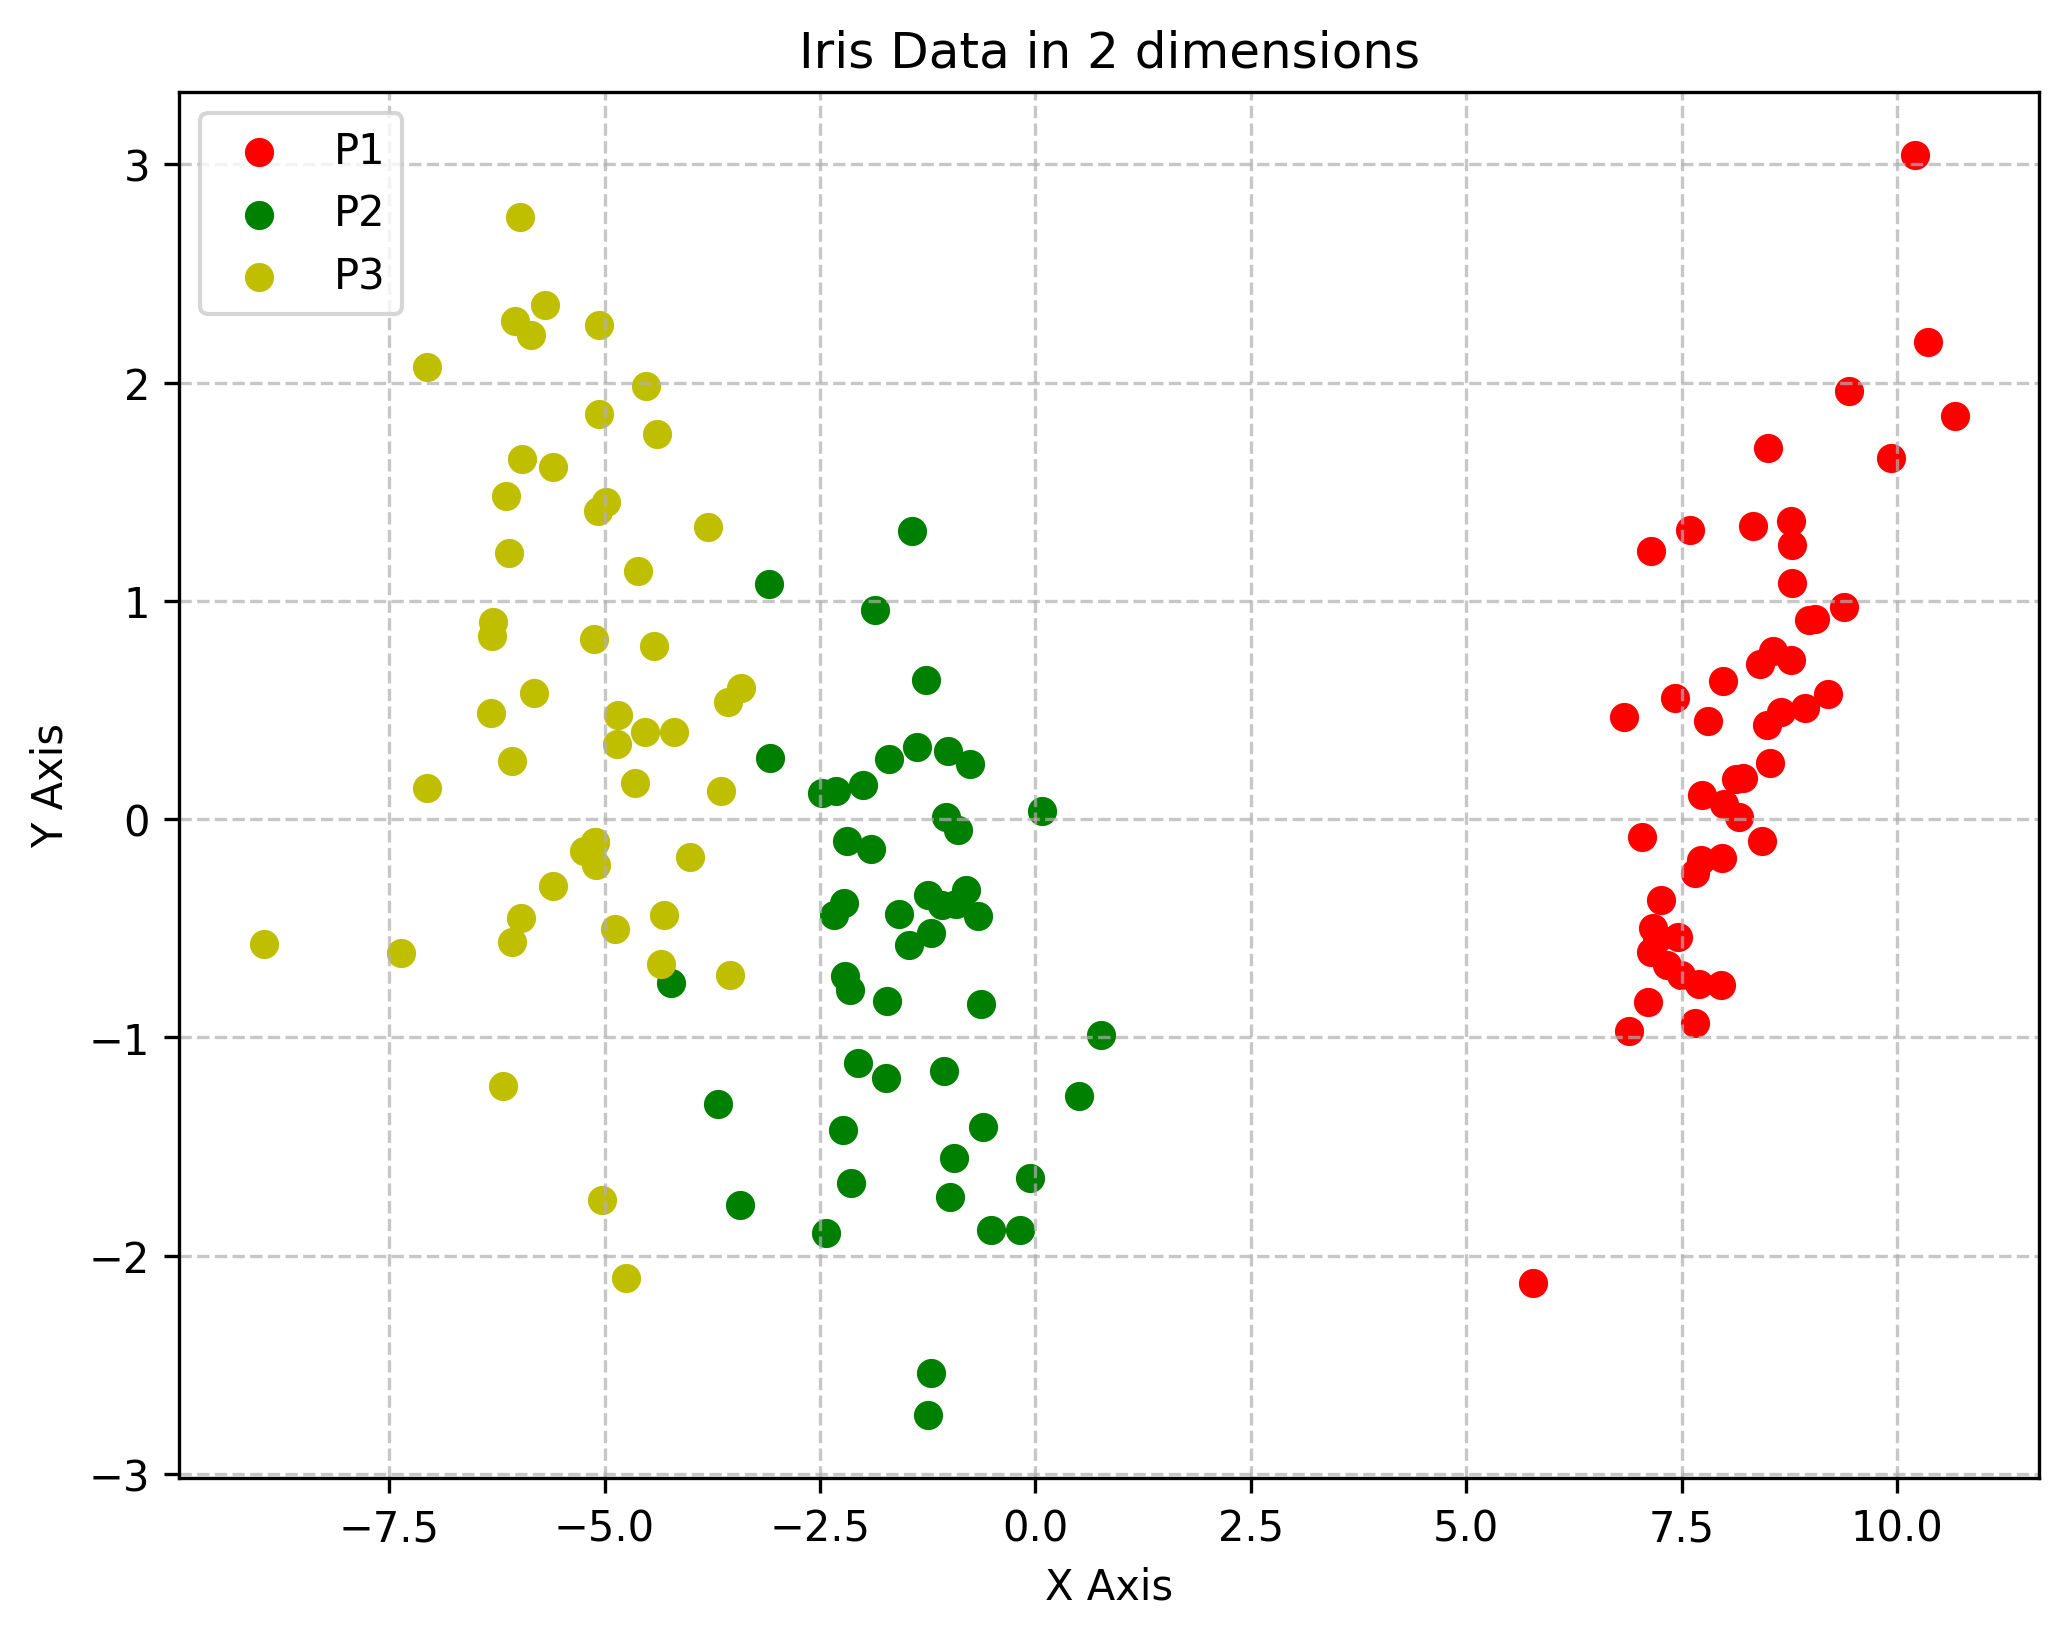

In [10]:

plt.figure(figsize=(8, 6), dpi=300)  # 调整图形大小和分辨率
plt.scatter(P1_lda[:,0],P1_lda[:,1], color='r', label='P1')
plt.scatter(P2_lda[:,0],P2_lda[:,1], color='g', label='P2')
plt.scatter(P3_lda[:,0],P3_lda[:,1], color='y', label='P3')

# 添加标题和坐标轴标签
plt.title('Iris Data in 2 dimensions')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线
# 显示图例
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)  # 添加网格线
plt.savefig('Iris Data in 2 dimensions')
# 显示散点图
plt.show()

In [11]:
def KNN_iris2(k, y, X, distace_type):
        acc = 0
        for i in range(150):
                X_te = X[i].reshape((1,2))
                X_tr = np.delete(X, i, axis=0)
                y_te = y[i].reshape(1)
                y_tr = np.delete(y, i, axis=0)
                acc += KNN(k, X_tr, y_tr, X_te, y_te, distace_type)
        return acc/150

In [12]:
for m in tqdm(range(20)):
        k = m + 1
        accuracy_all[3][m] = KNN_iris2(k, y, X_lda, np.inf)
        pass

100%|██████████| 20/20 [00:02<00:00,  8.37it/s]


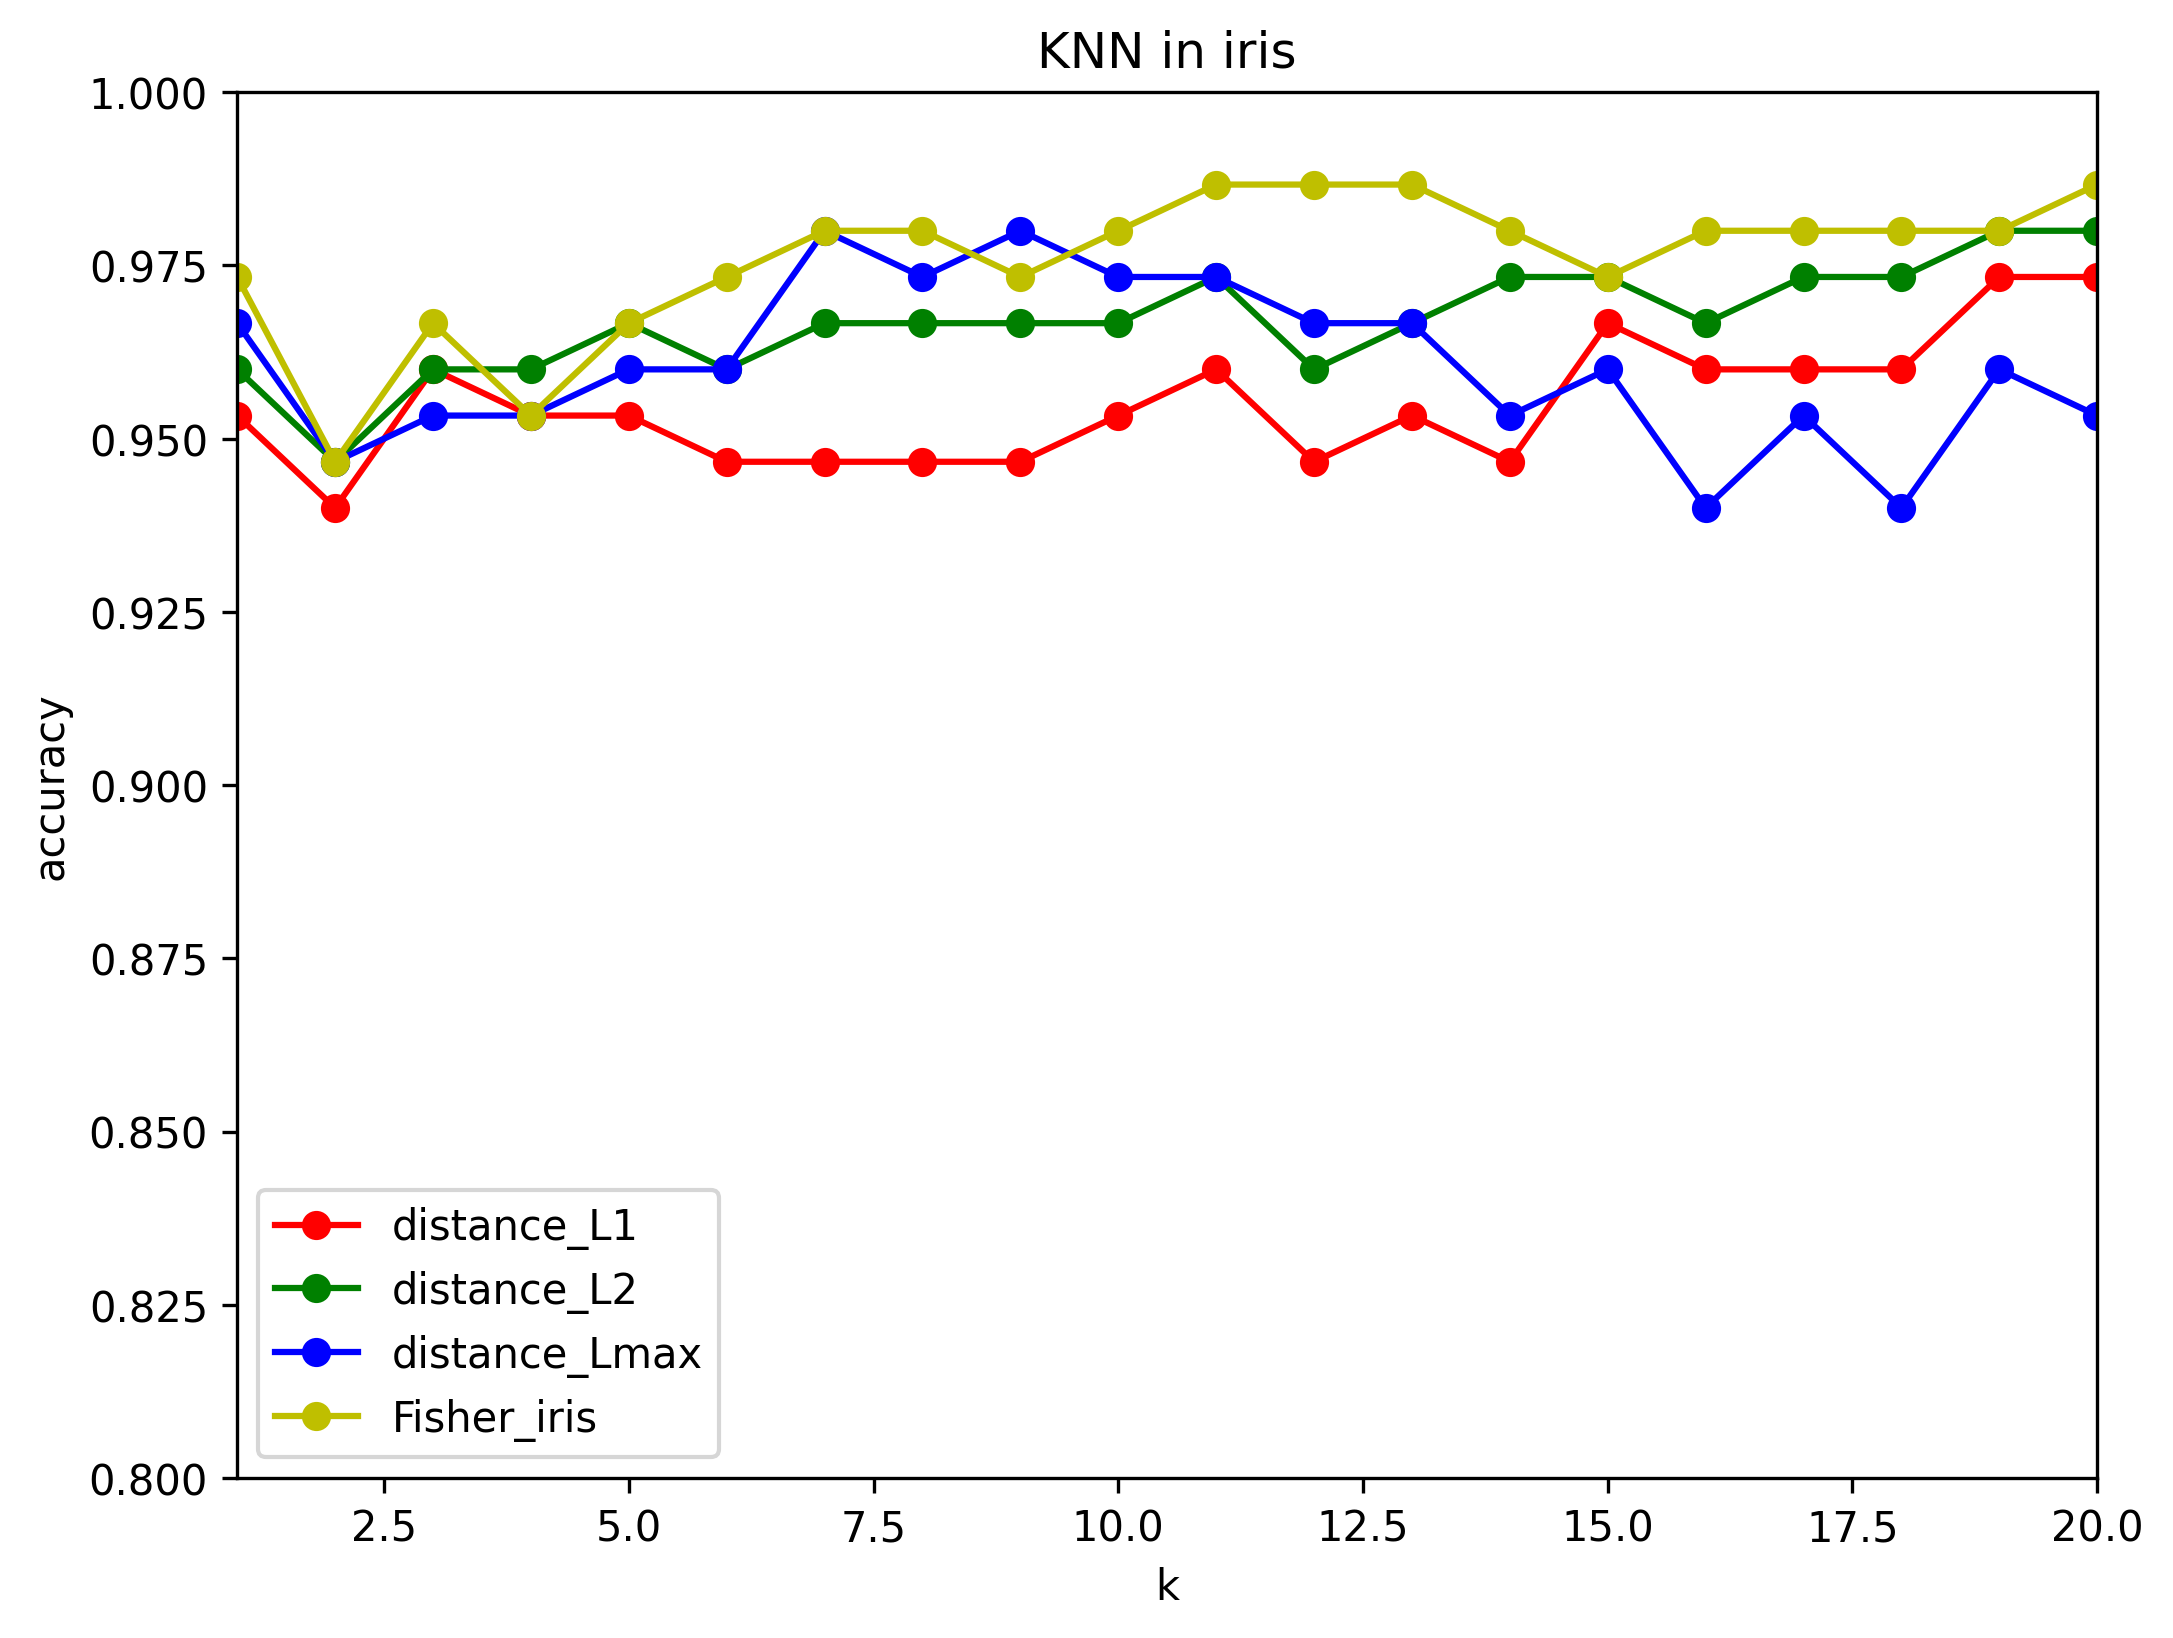

In [13]:
x = np.arange(1,21,1)
plt.figure(figsize=(8, 6), dpi=300)  # 调整图形大小和分辨率
plt.title("KNN in iris")
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xlim((1, 20))
plt.ylim((0.8, 1.0))
plt.plot(x, accuracy_all[0], 'r-o', label = "distance_L1")
plt.plot(x, accuracy_all[1], 'g-o', label = "distance_L2")
plt.plot(x, accuracy_all[2], 'b-o', label = "distance_Lmax")
plt.plot(x, accuracy_all[3], 'y-o', label="Fisher_iris") 
plt.legend()
plt.savefig('result of KNN in iris.jpg')
plt.show()